### 1. Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import warnings
warnings.filterwarnings('ignore')

### 2. Importing Dataset

In [3]:
# imorting the dataset
df=pd.read_csv("Titanic-Dataset.csv")

In [6]:
# randomly selected rows in the dataset 
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C


In [16]:
# rows and columns of the dataset
df.shape

(891, 12)

In [18]:
# the columns of the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Columns Description
1. PassangerId, unique idetnification number for each passangers
2. Survived, 0 = not survived | 1 = survived
3. Pclass, passenger class (1= 1st, 2 = 2nd, 3 = 3rd), and is a proxy for socio-economic class
4. Name, the names of passengers
5. Sex, Sex
6. Age, ages of the passengers in years
7. SibSb, the number of siblings and/or spouses a passenger
8. Parch, the number of children & parents of the passenger aboard the Titanic
9. Ticket, the ticket numberof passengers
10. Fare, the amount of money a passenger paid for their ticket
11. Cabin, the cabin number
12. Embarked, the port of embarkation for each passenger; C = Cherbourg, Q = Queenstown, and S = Southampton.

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the descriptive statistics summary, we can draw the following insights
1. The mean survival rate is 0.3838 (38.38%), meaning 61.62% of passengers did not survive.
2. The mean Pclass is around 2.31, and the 50th percentile (median) is 3.
3. The youngest passenger is 0.42 years, and the oldest is 80 years.
4. The maximum number of siblings/spouses is 8, and the maximum number of parents/children is 6.
5. The high standard deviation (49.69) suggests that some passengers paid much higher fares, likely in first-class cabins.


### 3. Missing values in the  dataset

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can notice, there are
* 177 missed age values
* 687 missed cabin details
* 2 missed embarked values


In [21]:
(df.isnull().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* Almost 20% of the age values are missed.
* 77% of cabin details are missed. Thus we can drop this column since most of the values are missed.
* 0.22% of the emarked values are missed.


### 4. Handling the missing value

In [27]:
# droping the cabin column
df.drop(columns='Cabin', inplace=True)

In [29]:
df.shape

(891, 11)

In [32]:
# for age column, impuation(median will be appropriate)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [34]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

It seems the Emnarked column is categorical, thus the missed value can be filled by the mode

In [47]:
df['Embarked'] = df['Embarked'].fillna('S') # since 'S' is the most frequent 

In [49]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 5. Encoding Categorical Variables

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


* 'Name', 'Ticket', and 'PassengerId' column have no signicant effect in our analysis so we can drop them and focus on the necessary Features only.

In [55]:
df.drop(columns = ['Name', 'Ticket', 'PassengerId'], axis = 1, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


* Sex and Embarked are both object type, nominal features, we need to encode them to get the best EDA from our data.

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

# Define nominal features
nominal_features = ['Sex', 'Embarked']

# Create a transformer for one-hot encoding categorical columns
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), df.select_dtypes(include=['object']).columns.tolist()),
    verbose_feature_names_out=False
)

# Apply transformation
data_encoded = transformer.fit_transform(df)
data = pd.DataFrame(data_encoded, columns=transformer.get_feature_names_out())

# Drop original nominal columns and concatenate the encoded data
df.drop(columns=nominal_features, inplace=True)
df = pd.concat([df, data], axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    float64
 7   Sex_male    891 non-null    float64
 8   Embarked_C  891 non-null    float64
 9   Embarked_Q  891 non-null    float64
 10  Embarked_S  891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 76.7 KB


### Lets see the correlation 

<Axes: >

<Figure size 1500x500 with 0 Axes>

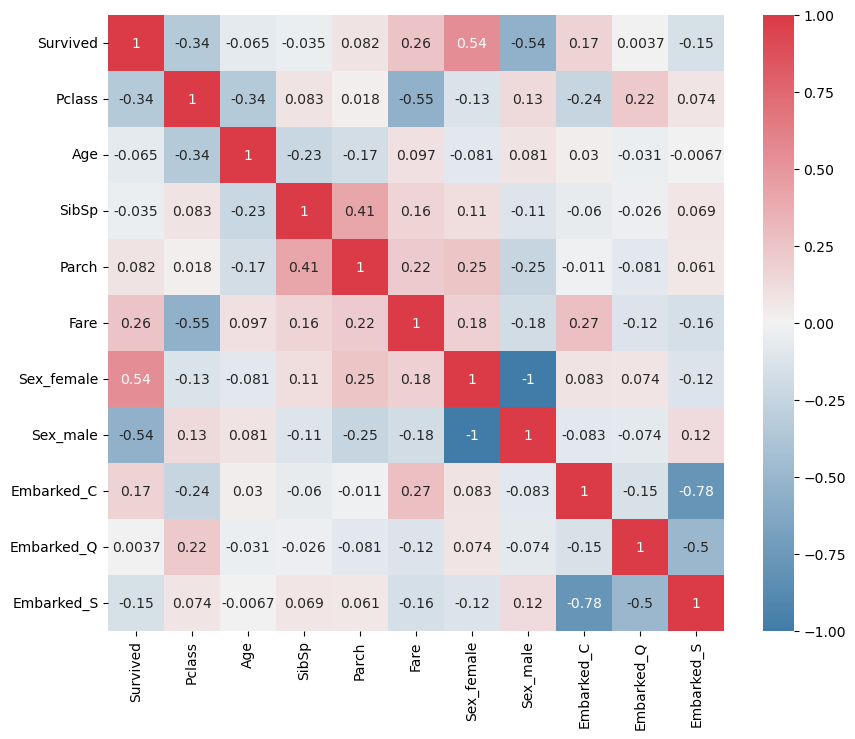

In [64]:
plt.figure(figsize = (15,5))
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10,as_cmap=True),
square=True, ax=ax, annot=True)

In [67]:
# lets focus on the survived column
df.corr()['Survived'].sort_values(ascending= False)

Survived      1.000000
Sex_female    0.543351
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64

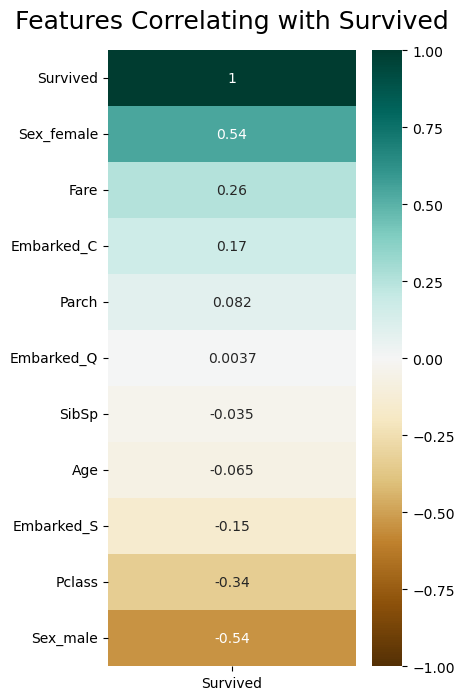

In [69]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df.corr(numeric_only=True)[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);

### 6. Uivarant analysis
###### 6.1 Survved column

Survived
0    549
1    342
Name: count, dtype: int64


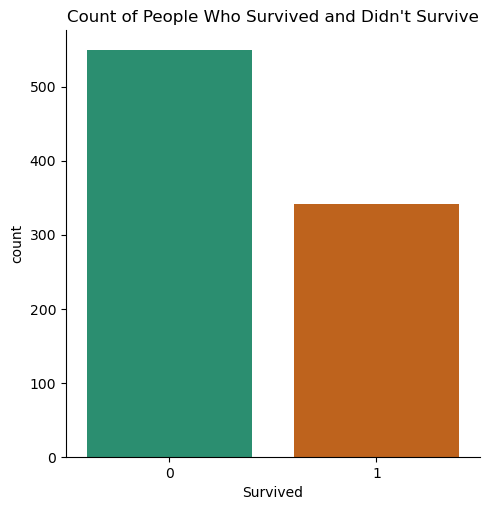

In [80]:
# Now to check how many passengers survived and how many didn't. I am using a count plot that counts the
sns.catplot(x='Survived', kind="count", palette="Dark2", data=df)
plt.title("Count of People Who Survived and Didn't Survive")

# Print the counts for the 'Survived' column
print(df['Survived'].value_counts())

* Out of the 891 passengers, 549(represented by 0) have not survived and 342(represented by 1) have survived.

In [83]:
# data will be used for plotting
data= pd.read_csv("Titanic-Dataset.csv")

##### 6.2 Sex column

Sex
male      577
female    314
Name: count, dtype: int64


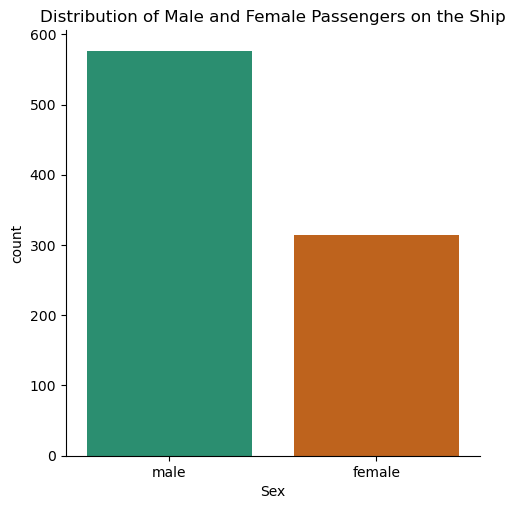

In [85]:
# Investigating the Sex column
sns.catplot(x="Sex", kind="count", palette="Dark2", data=data)
plt.title("Distribution of Male and Female Passengers on the Ship")

# Display the count of each gender
print(data['Sex'].value_counts())

* Male passengers are more than female passengers

Text(0.5, 1.0, 'Survival rate based on Gender')

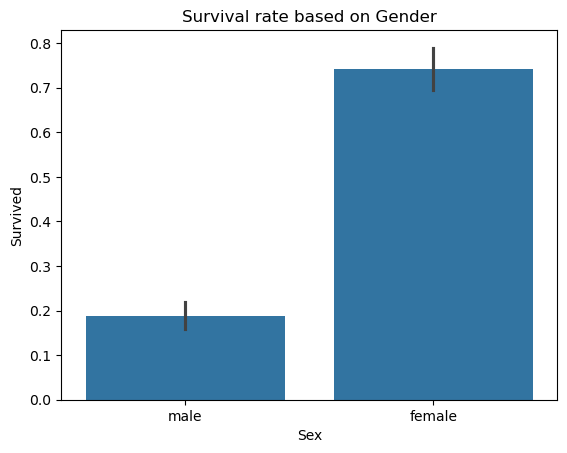

In [88]:
sns.barplot(data=data, x='Sex', y='Survived')
plt.title("Survival rate based on Gender")

* More female passengers have survived than males

In [91]:
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

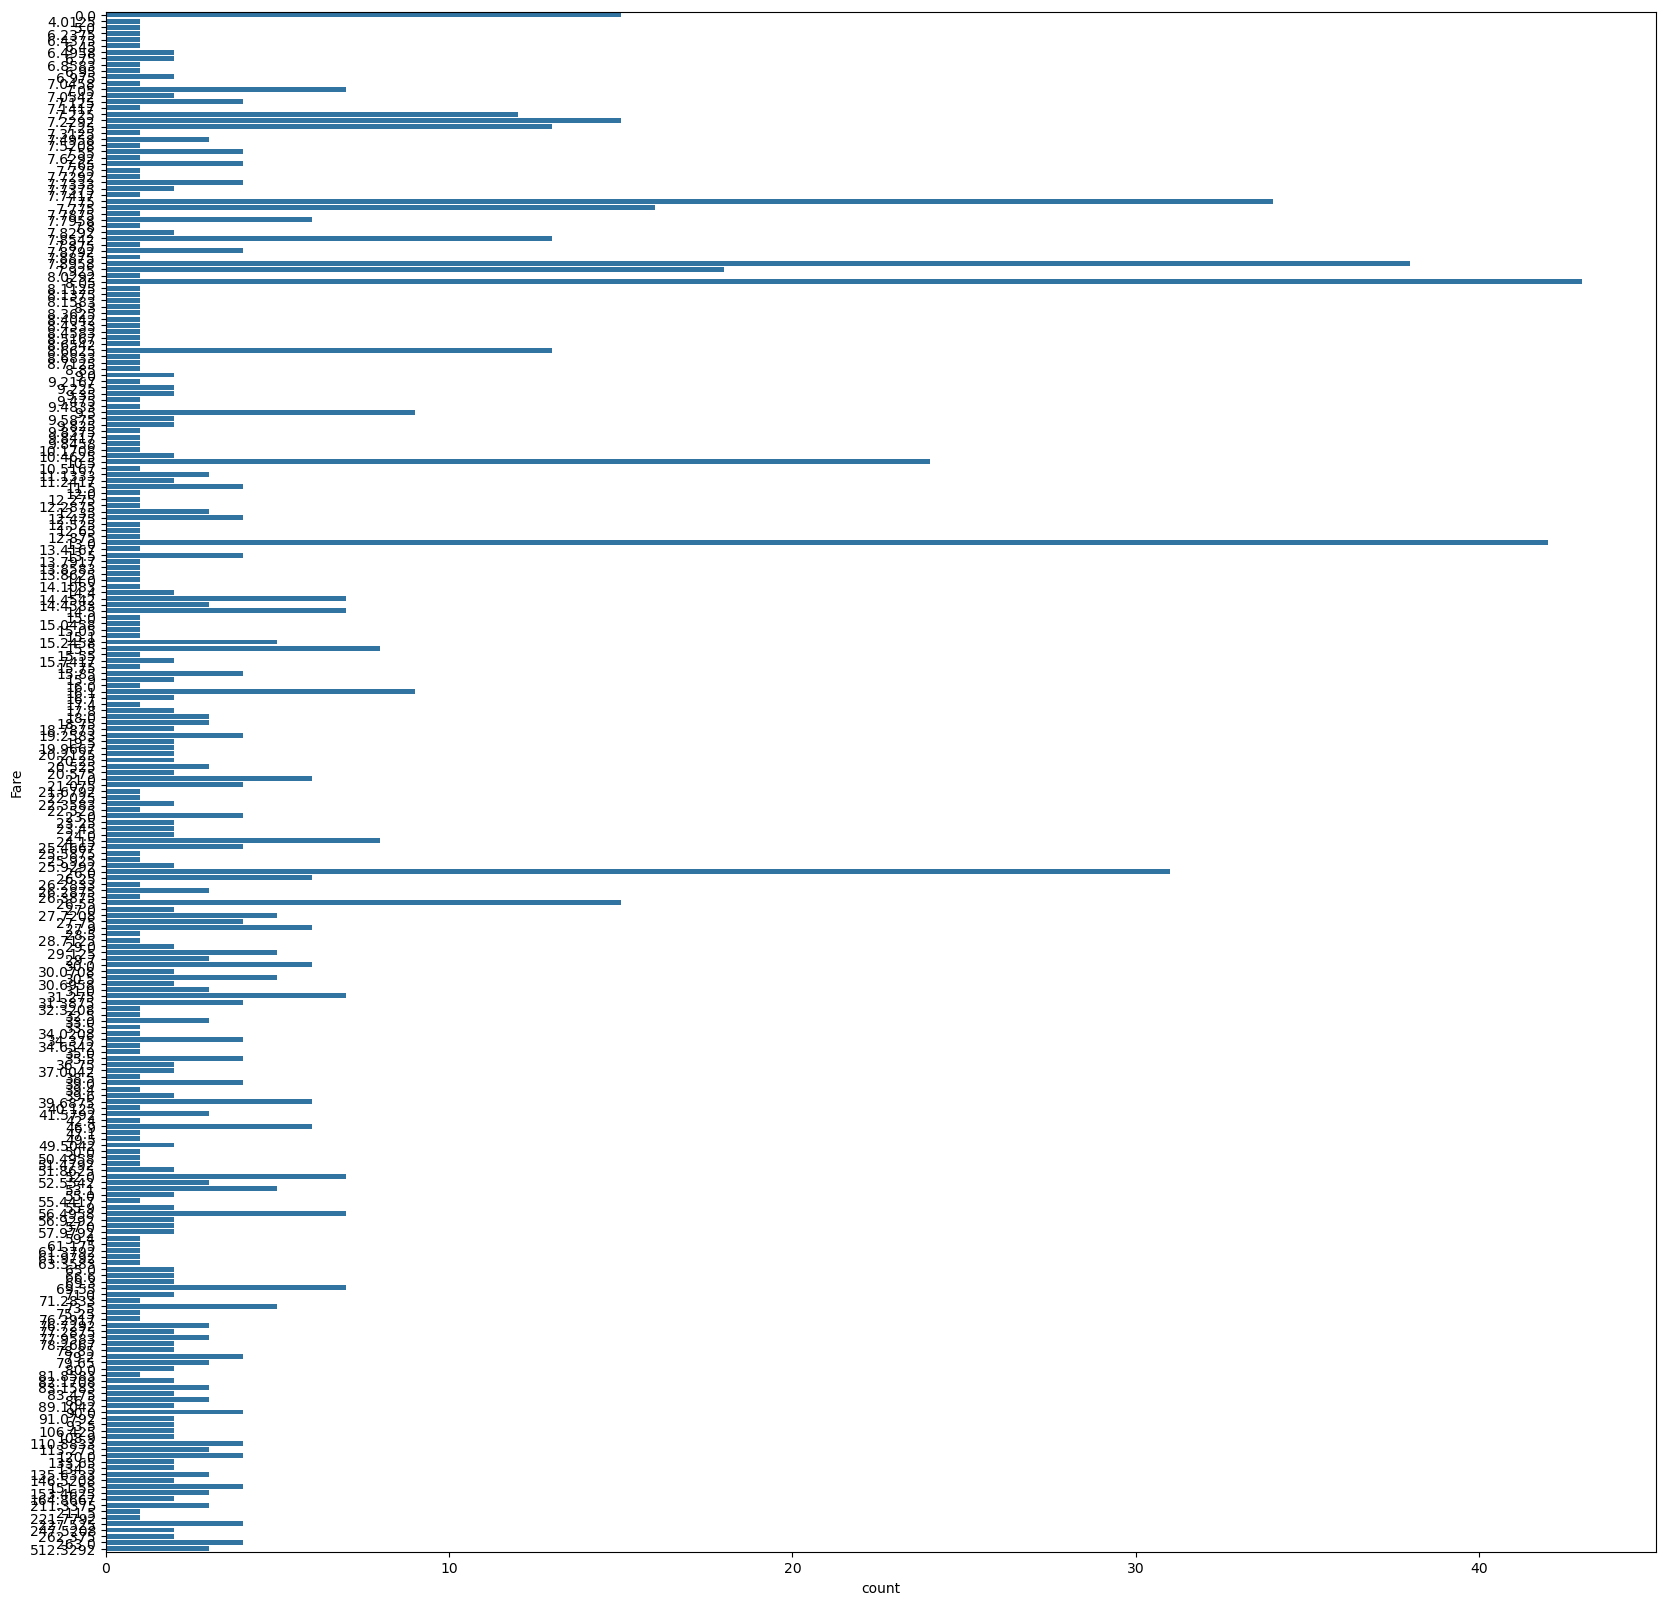

In [95]:

fig = plt.figure(figsize=(20,20))
sns.countplot(y=data['Fare'], data=data);

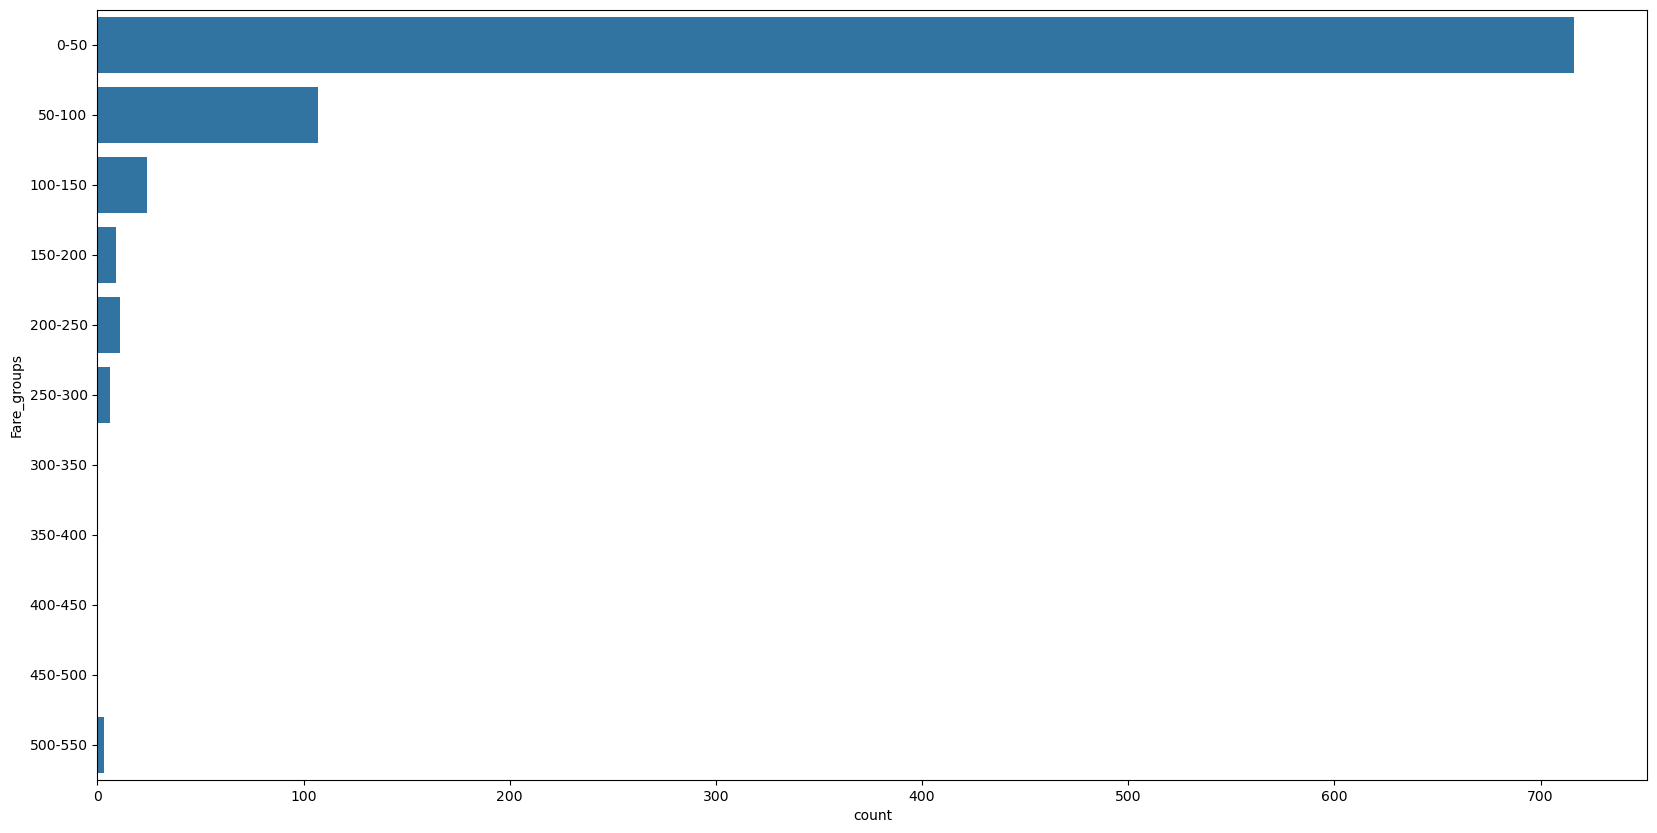

In [97]:
data['Fare_groups'] = pd.cut(data['Fare'],[0,50,100,150,200,250,300,350,400,450, 500, 550],labels=['0-50','50-100','100-150','150-200','200-250','250-300',
'300-350','350-400','400-450','450-500','500-550'])
fig = plt.figure(figsize=(20,10))
sns.countplot(y=data['Fare_groups'], data=data);

Text(0.5, 1.0, 'Survival rate based on Fare paid')

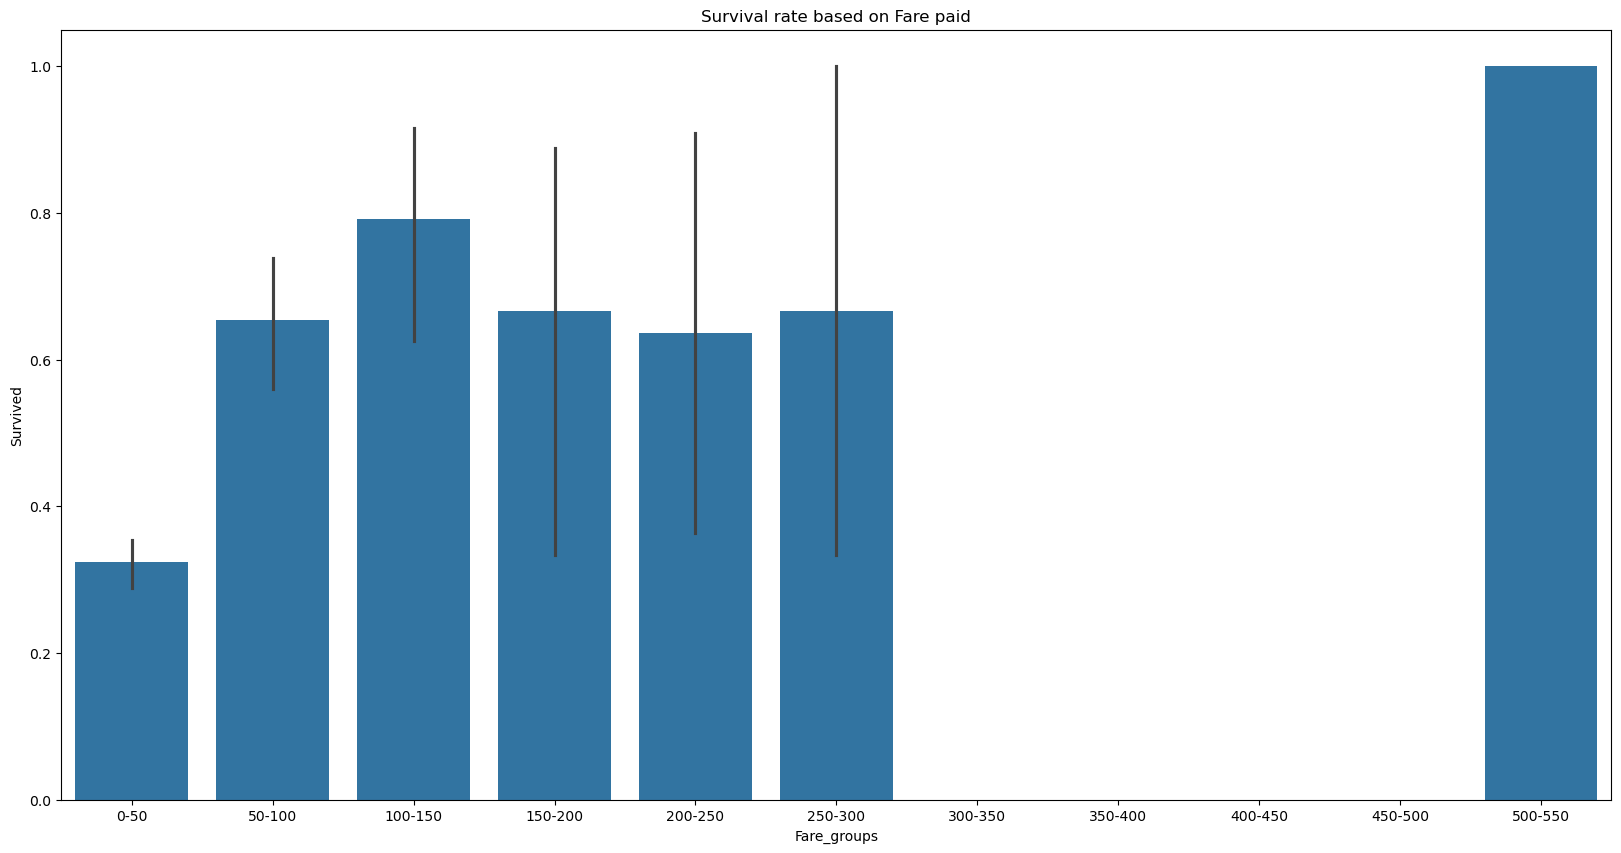

In [99]:
# we can see impact of Fare on survival rate.
fig = plt.figure(figsize=(20,10))
sns.barplot(data=data, x='Fare_groups', y='Survived')
plt.title("Survival rate based on Fare paid")

* Passengers who paid the highest fares (500 - 550) had the highest survival rates, as they were given priority on lifeboats. In contrast, those who paid the lowest fares (0 - 50) had the lowest survival rates.

##### 6.4 Pclass column

Text(0.5, 1.0, 'Survival rate based on Sibling/Spouse Feature')

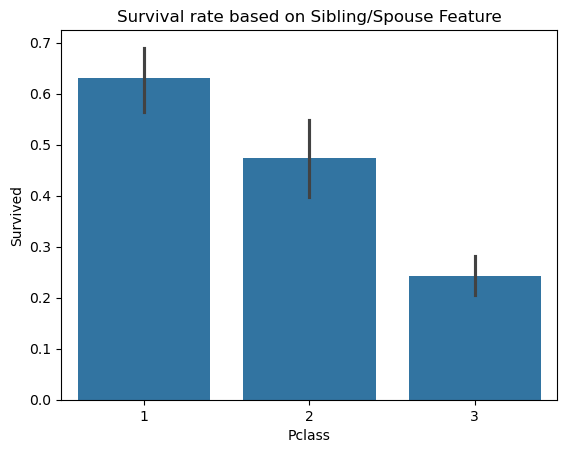

In [104]:
sns.barplot(data=data, x='Pclass', y='Survived')
plt.title("Survival rate based on Sibling/Spouse Feature")

* Passengers who had tickets for an upper-class (first class), had higher chances of survival. Passengers in third class (Pclass = 3) had the lowest survival rates.

In [107]:
# Pclass column analysis  
pclass_counts = data['Pclass'].value_counts(normalize=True) * 100  
print(pclass_counts)  

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


* Most passengers were in Third Class (Pclass 3)
* First Class had the second-highest proportion
* Second Class had the least representation

Likewise, we can discover the remaining columns

## 7. Multivariate Analysis

#### Survival vs Pclass

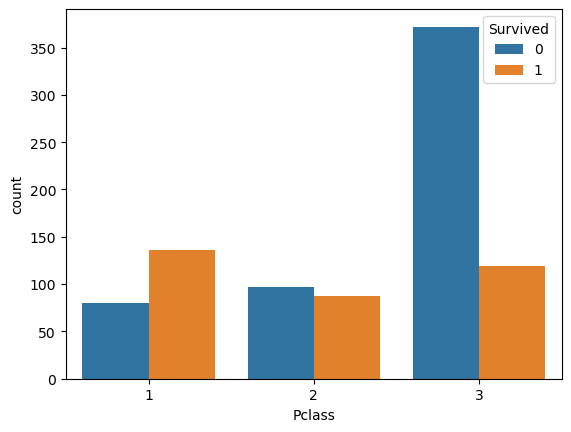

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [117]:
sns.countplot(x='Pclass', hue='Survived', data=df)  
plt.show()  

# Cross-tabulation for Pclass  
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1) 

* First-Class passengers had the best chance of survival(63%), likely due to priority access to lifeboats and better accommodations.
* Second-Class passengers had less priority(47.3%) compared to First Class but still had a better chance of survival than those in Third Class.
* Third-Class passengers had the poorest chance of survival(24.2%), likely due to being in the lower decks, further away from lifeboats, and less likely to be prioritized during the evacuation.

## 8. Handling Outlier

##### Visualizing outliers in age column

<Axes: ylabel='Age'>

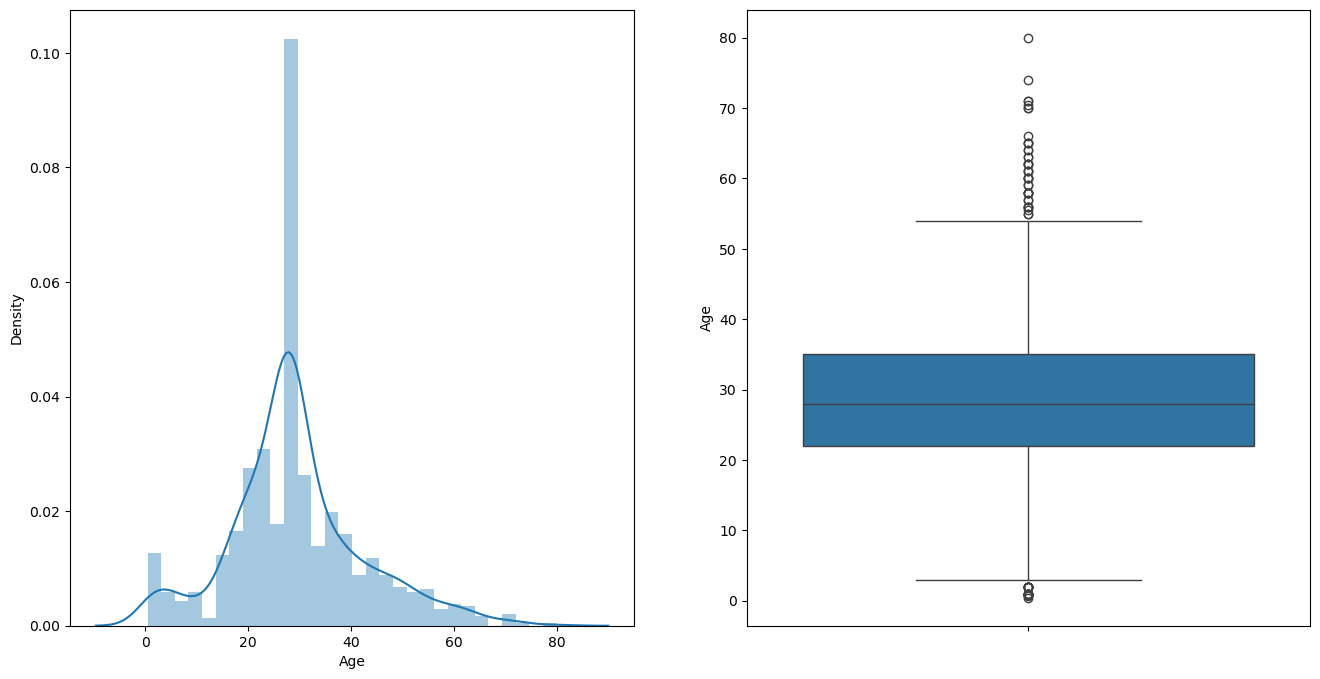

In [131]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(df['Age'])

* The data appears approximately normal, but there are some outliers.

In [134]:
# let me calculate inter quartile range
i25 = df['Age'].quantile(0.25)
i75 = df['Age'].quantile(0.75)
Iqr = i75 - i25
upper_limit = i75 + 1.5*Iqr
lower_limit = i25 - 1.5*Iqr

In [136]:
# generate the list of outliers from the data
df[df['Age'] > upper_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
11,1,1,58.0,0,0,26.5500,1.0,0.0,0.0,0.0,1.0
15,1,2,55.0,0,0,16.0000,1.0,0.0,0.0,0.0,1.0
33,0,2,66.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
54,0,1,65.0,0,1,61.9792,0.0,1.0,1.0,0.0,0.0
94,0,3,59.0,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
96,0,1,71.0,0,0,34.6542,0.0,1.0,1.0,0.0,0.0
116,0,3,70.5,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
152,0,3,55.5,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
170,0,1,61.0,0,0,33.5000,0.0,1.0,0.0,0.0,1.0
174,0,1,56.0,0,0,30.6958,0.0,1.0,1.0,0.0,0.0


In [138]:
df[df['Age'] < lower_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
7,0,3,2.00,3,1,21.0750,0.0,1.0,0.0,0.0,1.0
16,0,3,2.00,4,1,29.1250,0.0,1.0,0.0,1.0,0.0
78,1,2,0.83,0,2,29.0000,0.0,1.0,0.0,0.0,1.0
119,0,3,2.00,4,2,31.2750,1.0,0.0,0.0,0.0,1.0
164,0,3,1.00,4,1,39.6875,0.0,1.0,0.0,0.0,1.0
172,1,3,1.00,1,1,11.1333,1.0,0.0,0.0,0.0,1.0
183,1,2,1.00,2,1,39.0000,0.0,1.0,0.0,0.0,1.0
205,0,3,2.00,0,1,10.4625,1.0,0.0,0.0,0.0,1.0
297,0,1,2.00,1,2,151.5500,1.0,0.0,0.0,0.0,1.0
305,1,1,0.92,1,2,151.5500,0.0,1.0,0.0,0.0,1.0


handling the outlier

In [140]:
new_df = df.copy()

In [143]:
new_df['Age'] = np.where(new_df['Age'] > upper_limit, upper_limit, np.where(new_df['Age'] < lower_limit, lower_limit, new_df['Age']))

In [145]:
new_df[new_df['Age'] > upper_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S


In [147]:
new_df[new_df['Age'] < lower_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S


<Axes: ylabel='Age'>

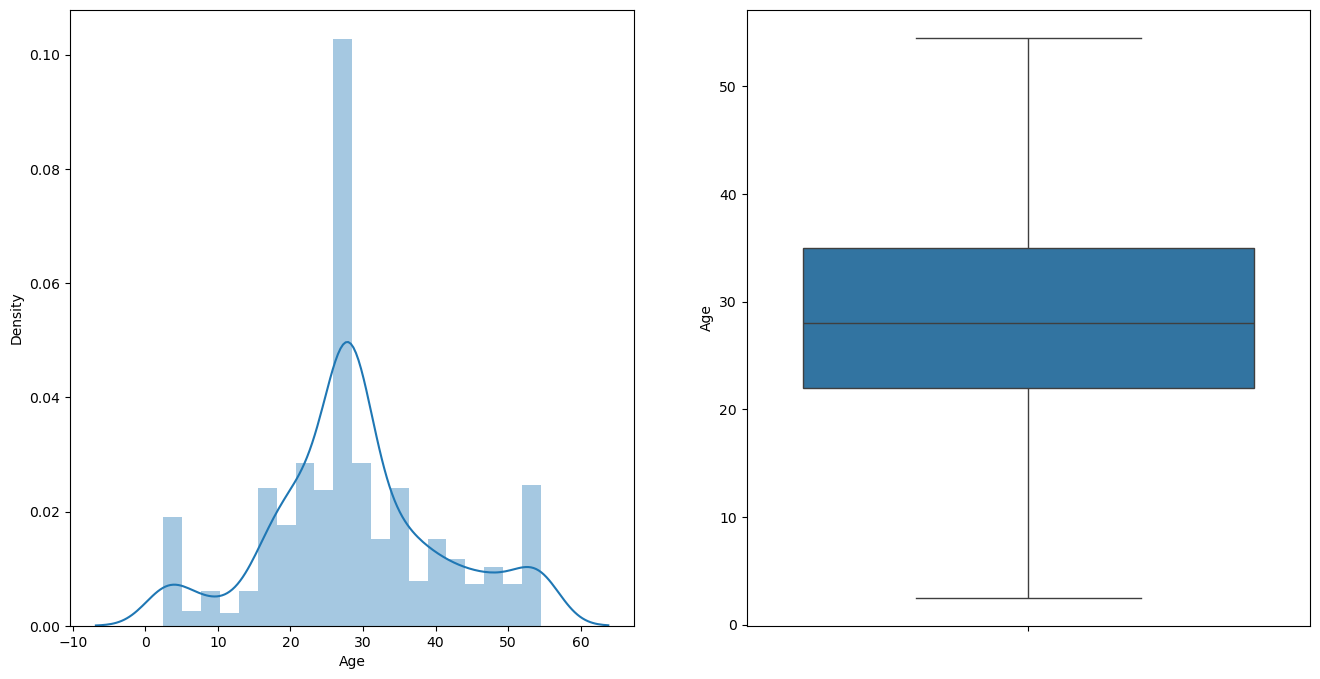

In [149]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.distplot(new_df['Age'])

plt.subplot(1,2,2)
sns.boxplot(new_df['Age'])

* No outliers are visible in the data.

##### Visualizing outlier from Fare column

<Axes: ylabel='Fare'>

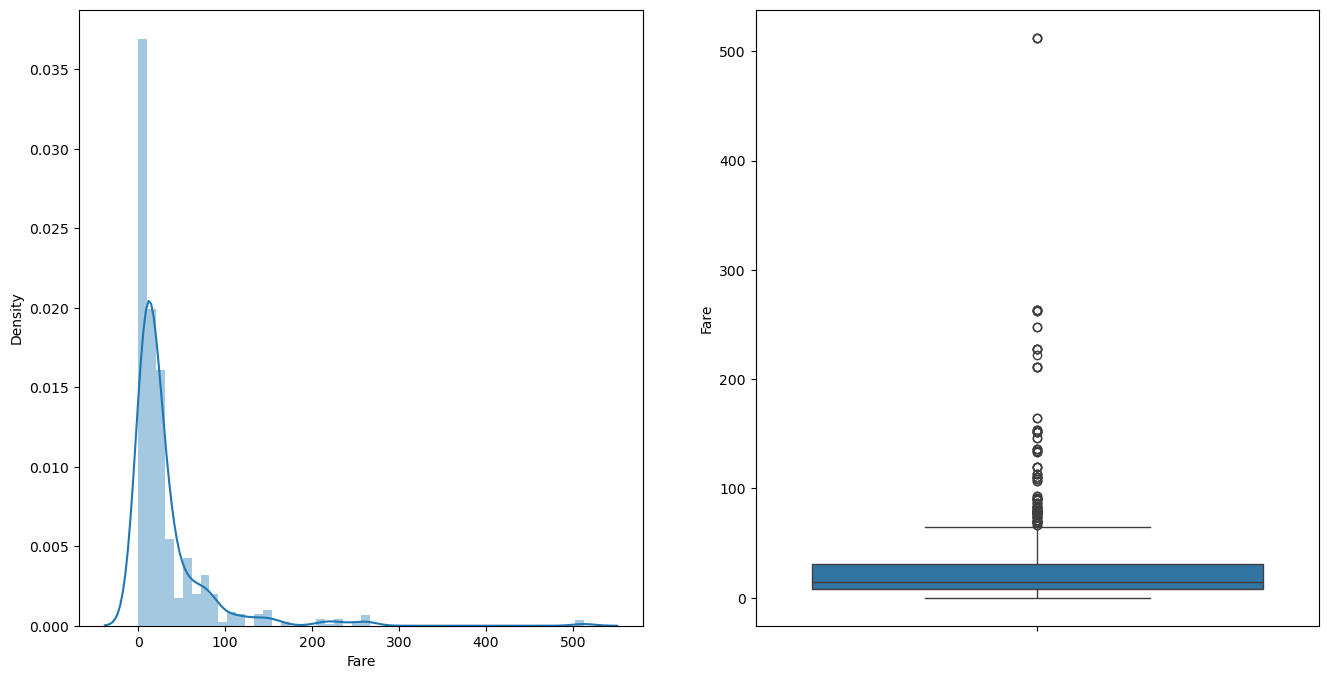

In [153]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Fare'])

plt.subplot(1,2,2)
sns.boxplot(df['Fare'])

In [155]:
# calculate inter quartile range
i25 = df['Fare'].quantile(0.25)
i75 = df['Fare'].quantile(0.75)
Iqr = i75 - i25
upper_limit = i75 + 1.5*Iqr
lower_limit = i25 - 1.5*Iqr

In [157]:

# generate the list of overfitting data
df[df['Fare'] > upper_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
27,0,1,19.0,3,2,263.0000,0.0,1.0,0.0,0.0,1.0
31,1,1,28.0,1,0,146.5208,1.0,0.0,1.0,0.0,0.0
34,0,1,28.0,1,0,82.1708,0.0,1.0,1.0,0.0,0.0
52,1,1,49.0,1,0,76.7292,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,28.0,8,2,69.5500,0.0,1.0,0.0,0.0,1.0
849,1,1,28.0,1,0,89.1042,1.0,0.0,1.0,0.0,0.0
856,1,1,45.0,1,1,164.8667,1.0,0.0,0.0,0.0,1.0
863,0,3,28.0,8,2,69.5500,1.0,0.0,0.0,0.0,1.0


In [ ]:
df[df['Fare'] > lower_limit]

In [161]:
new_df['Fare'] = np.where(new_df['Fare'] > upper_limit, upper_limit, np.where(new_df['Fare'] < lower_limit, lower_limit, new_df['Fare']))

In [163]:

new_df[new_df['Fare'] > upper_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S


In [165]:
new_df[new_df['Fare'] < lower_limit]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S


<Axes: ylabel='Fare'>

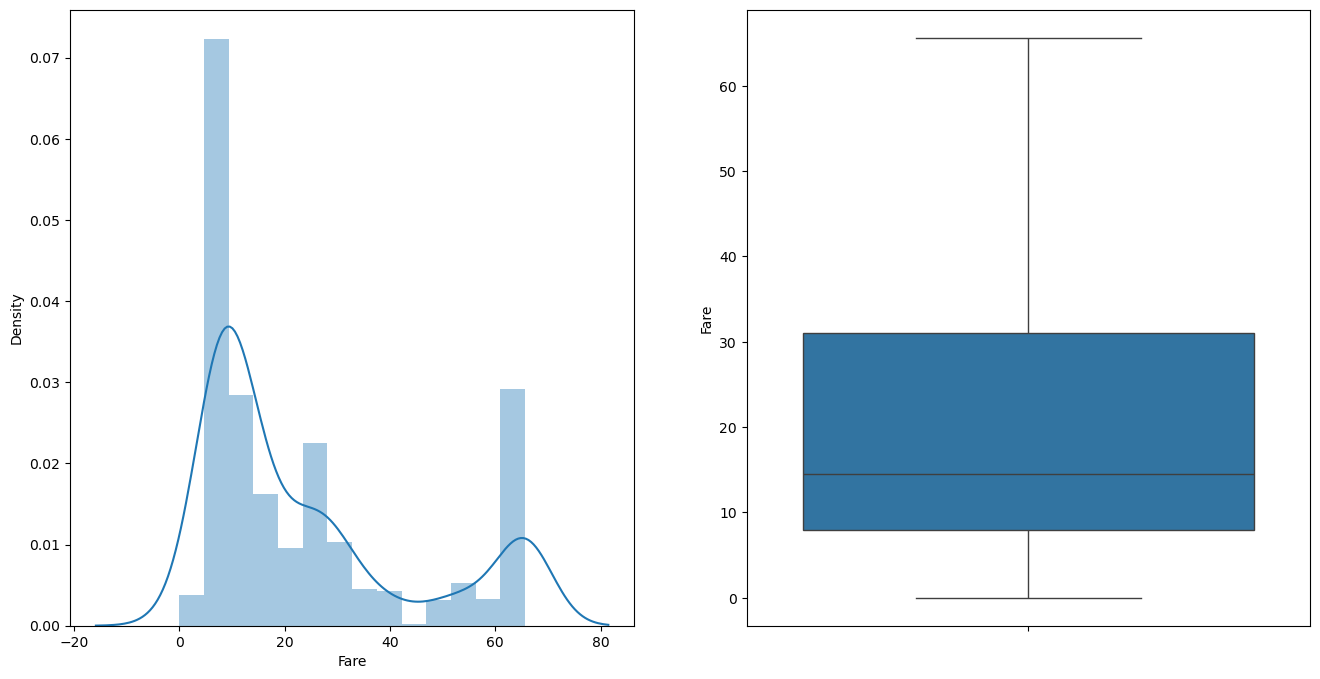

In [167]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.distplot(new_df['Fare'])

plt.subplot(1,2,2)
sns.boxplot(new_df['Fare'])